# Business understanding
Goal is to segment customers based on their income and spending habits. This will help the marketing team to target the right customers with the right products.


## Data Understanding

## Data Preparation

In [478]:
import pandas  as pd
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["Age"] = 2025 - df["Year_Birth"]
df.drop(['ID'] , axis=1, inplace=True)
df.drop(df[df['Income'] > 200000].index, inplace = True)
df = df.dropna()

In [479]:
features = ["Income"]
features_spent = ["TotalSpent"]
X_continuous = df[features]

## Data Modeling

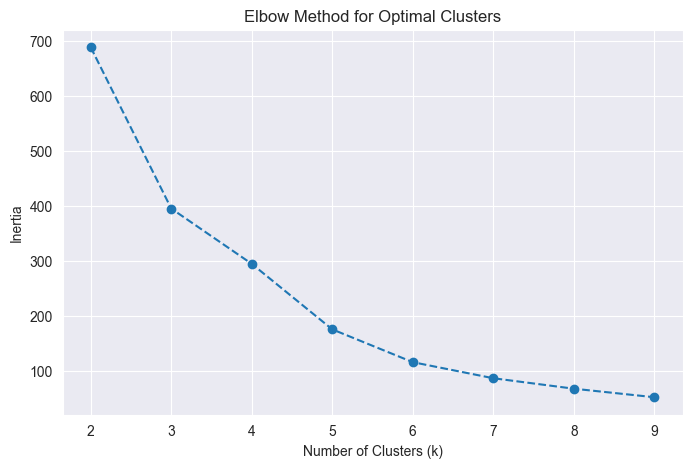

In [480]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_continuous)
# Convert back to DataFrame
X_scaled = pd.DataFrame(X_continuous_scaled, columns=features)



inertia = []
K_range = range(2, 10) 

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)  

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()
    
    

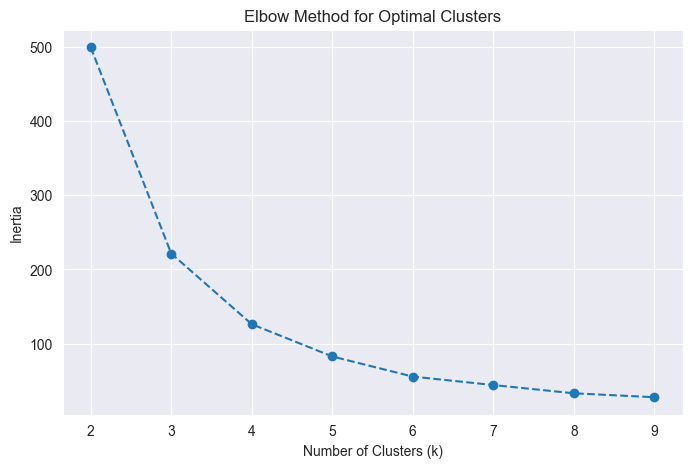

In [481]:
X_spent = df[features_spent]
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_spent)
# Convert back to DataFrame
X_scaled_spent = pd.DataFrame(X_continuous_scaled, columns=features_spent)



inertia = []
K_range = range(2, 10) 

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled_spent)
    inertia.append(model.inertia_)  

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [482]:
model = KMeans(init='random', n_clusters=4, random_state=42).fit(X_scaled)
model_spent = KMeans(init='random', n_clusters=4, random_state=42).fit(X_scaled_spent)
X_scaled['Cluster'] = model.labels_
X_scaled['Cluster'].value_counts()


Cluster
3    678
2    671
0    459
1    407
Name: count, dtype: int64

<Axes: xlabel='Cluster'>

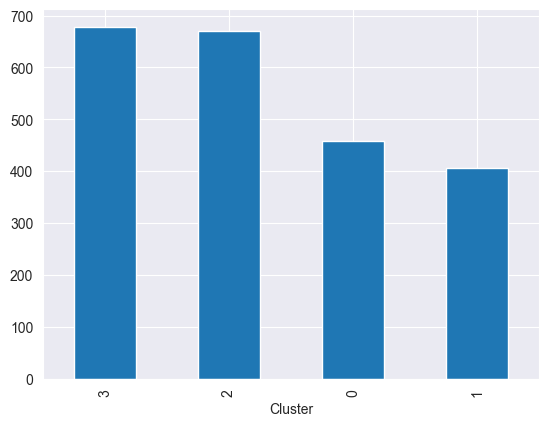

In [483]:
X_scaled['Cluster'].value_counts().plot(kind='bar')

In [484]:

X_scaled.groupby('Cluster').mean()

,Income
Cluster,
0,-1.329294
1,1.427622
2,0.503528
3,-0.455403


In [485]:
from sklearn.metrics import silhouette_score
# Compute Silhouette Score
silhouette = silhouette_score(X_scaled, model.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette:.2f}")

Silhouette Score for 3 clusters: 0.78


In [486]:
silhouette_score = silhouette_score(X_scaled_spent, model_spent.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette_score:.2f}")

Silhouette Score for 3 clusters: 0.65


In [487]:
df["Cluster"] = model.fit_predict(X_scaled)
df["SpendingCluster"] = model_spent.fit_predict(X_scaled_spent)
#mean of all clusters
df.groupby("Cluster")["Income"].mean()


Cluster
0    42168.918879
1    82694.375921
2    23361.509804
3    62806.515648
Name: Income, dtype: float64

In [488]:
df.groupby("SpendingCluster")["TotalSpent"].mean()

SpendingCluster
0    1112.374723
1     572.546099
2    1755.031915
3     100.500472
Name: TotalSpent, dtype: float64

## Results Evaluation

In [489]:


df.loc[df["Cluster"] == 2, "Segment"] = "Poor"
df.loc[df["Cluster"] == 0, "Segment"] = "Medium Income"
df.loc[df["Cluster"] == 3, "Segment"] = "High Income"
df.loc[df["Cluster"] == 1, "Segment"] = "Rich"

df.loc[df["SpendingCluster"] == 3, "SpendingHabits"] = "Low Spender"
df.loc[df["SpendingCluster"] == 1, "SpendingHabits"] = "Medium Spender"
df.loc[df["SpendingCluster"] == 0, "SpendingHabits"] = "High Spender"
df.loc[df["SpendingCluster"] == 2, "SpendingHabits"] = "Very High Spender"


In [490]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster,Segment,SpendingHabits
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,3,11,1,1617,68,3,2,High Income,Very High Spender
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,3,11,0,27,71,0,3,Medium Income,Low Spender
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,3,11,0,776,60,3,1,High Income,Medium Spender
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,3,11,0,53,41,2,3,Poor,Low Spender
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,3,11,0,422,44,3,1,High Income,Medium Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,3,11,0,1341,58,3,0,High Income,High Spender
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,0,3,11,0,444,79,3,1,High Income,Medium Spender
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,3,11,0,1241,44,3,0,High Income,High Spender
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,3,11,0,843,69,3,0,High Income,High Spender


In [491]:
df_poor = df[df["Segment"] == "Poor"]
df_rich = df[df["Segment"] == "Rich"]
df_high_income = df[df["Segment"] == "High Income"]
df_medium_income = df[df["Segment"] == "Medium Income"]

In [492]:
features_to_plot = ["MntWines","TotalSpent" ,"MntGoldProds"]
df_poor.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster
count,459.00000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,...,459.0,459.0,459.000000,459.0,459.0,459.000000,459.000000,459.00000,459.0,459.000000
mean,1974.45098,23361.509804,0.779956,0.206972,48.267974,18.028322,5.836601,21.640523,8.444444,5.773420,...,0.0,0.0,0.010893,3.0,11.0,0.104575,76.152505,50.54902,2.0,2.941176
std,10.43504,6820.240394,0.478297,0.416205,29.087957,30.669482,10.739140,83.539673,15.098030,9.945752,...,0.0,0.0,0.103914,0.0,0.0,0.306339,112.031317,10.43504,0.0,0.335041
min,1946.00000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,3.0,11.0,0.000000,5.000000,29.00000,2.0,1.000000
25%,1969.00000,19380.000000,1.000000,0.000000,23.500000,4.000000,1.000000,6.000000,2.000000,1.000000,...,0.0,0.0,0.000000,3.0,11.0,0.000000,31.000000,42.00000,2.0,3.000000
50%,1976.00000,24434.000000,1.000000,0.000000,47.000000,9.000000,3.000000,11.000000,4.000000,3.000000,...,0.0,0.0,0.000000,3.0,11.0,0.000000,50.000000,49.00000,2.0,3.000000
75%,1983.00000,28704.500000,1.000000,0.000000,75.000000,18.000000,7.000000,19.000000,11.000000,7.000000,...,0.0,0.0,0.000000,3.0,11.0,0.000000,77.500000,56.00000,2.0,3.000000
max,1996.00000,32727.000000,2.000000,2.000000,99.000000,284.000000,151.000000,1725.000000,175.000000,157.000000,...,0.0,0.0,1.000000,3.0,11.0,1.000000,1730.000000,79.00000,2.0,3.000000


In [493]:
df_rich.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.00000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.0,407.0,407.000000,407.000000,407.000000,407.0,407.000000
mean,1967.717445,82694.375921,0.071253,0.240786,49.783784,657.14742,64.737101,468.432432,91.218673,67.503686,...,0.267813,0.034398,0.004914,3.0,11.0,0.314496,1420.496314,57.282555,1.0,1.127764
std,13.406537,11761.516994,0.257564,0.466628,29.549281,337.31875,50.419444,260.893208,67.455761,53.611441,...,0.443365,0.182474,0.070014,0.0,0.0,0.464886,458.342472,13.406537,0.0,0.964079
min,1899.000000,72679.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,6.000000,30.000000,1.0,0.000000
25%,1958.000000,76713.000000,0.000000,0.000000,24.000000,407.50000,24.000000,272.000000,35.500000,26.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1104.500000,48.000000,1.0,0.000000
50%,1969.000000,80360.000000,0.000000,0.000000,51.000000,619.00000,51.000000,428.000000,73.000000,53.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1428.000000,56.000000,1.0,2.000000
75%,1977.000000,84618.000000,0.000000,0.000000,75.000000,904.50000,99.000000,650.500000,141.000000,102.000000,...,1.000000,0.000000,0.000000,3.0,11.0,1.000000,1734.500000,67.000000,1.0,2.000000
max,1995.000000,162397.000000,1.000000,2.000000,99.000000,1493.00000,197.000000,1725.000000,258.000000,262.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,126.000000,1.0,3.000000


<Figure size 1200x600 with 0 Axes>

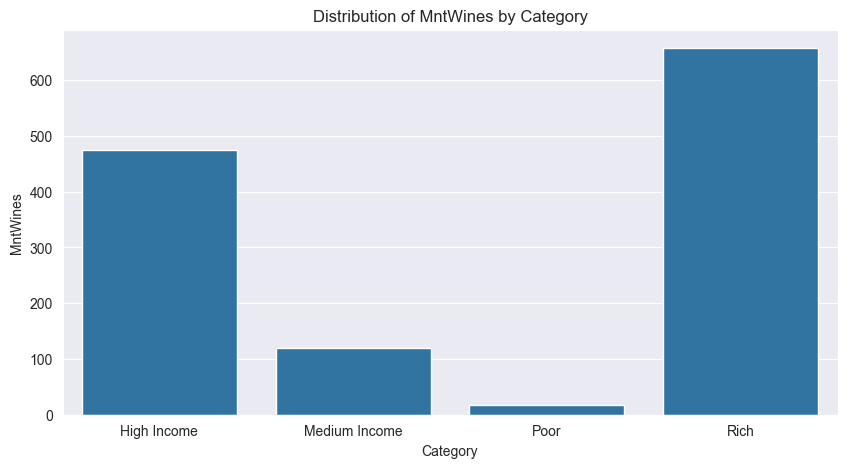

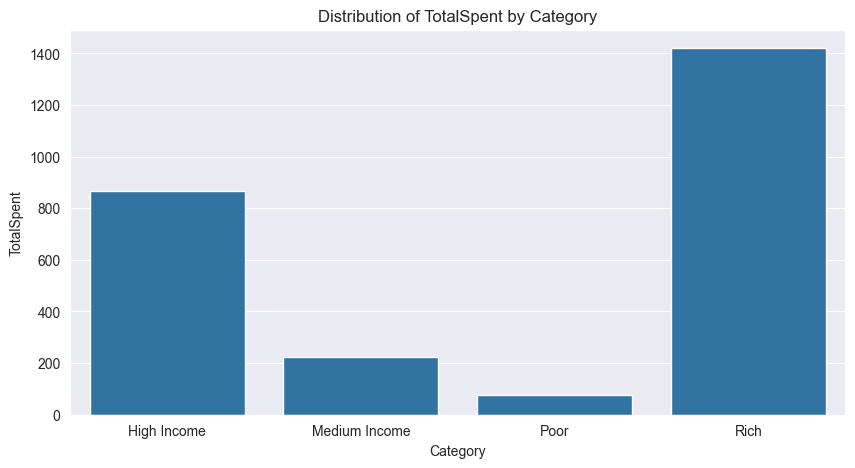

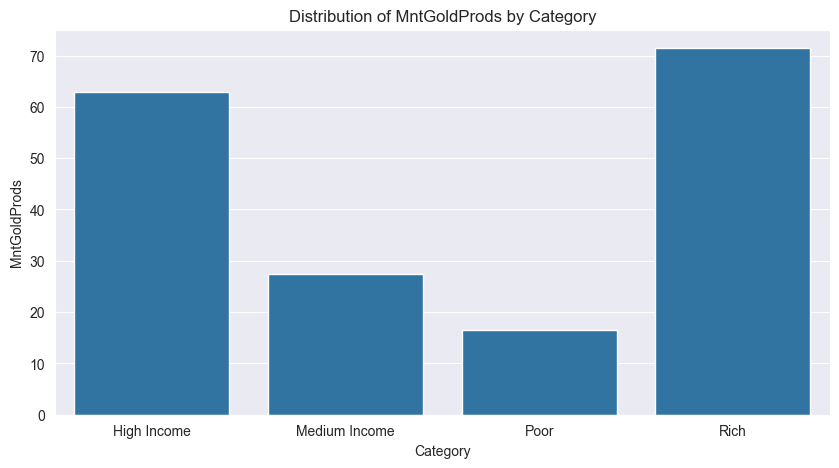

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df and has a column 'Category' (e.g., "rich" and "poor")
plt.figure(figsize=(12, 6))

for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df["Segment"], y=df[feature],errorbar=None)
    plt.title(f"Distribution of {feature} by Category")
    plt.xlabel("Category")
    plt.ylabel(feature)
    plt.show()

In [495]:
df.groupby("SpendingCluster")["TotalSpent"].mean()

SpendingCluster
0    1112.374723
1     572.546099
2    1755.031915
3     100.500472
Name: TotalSpent, dtype: float64

In [496]:

pd.crosstab(df["SpendingHabits"], df["Segment"])


Segment,High Income,Medium Income,Poor,Rich
SpendingHabits,,,,
High Spender,270,20,0,161
Low Spender,91,518,445,5
Medium Spender,233,139,13,38
Very High Spender,77,1,1,203


In [498]:
df[(df["SpendingHabits"] == "High Spender") & (df["Segment"] == "Medium Income")]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster,Segment,SpendingHabits
39,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,8,...,0,3,11,1,902,82,0,0,Medium Income,High Spender
107,1969,Graduation,Married,52413.0,0,2,02-02-2013,56,295,106,...,0,3,11,0,910,56,0,0,Medium Income,High Spender
227,1952,Graduation,Divorced,51537.0,0,1,09-12-2012,27,787,20,...,0,3,11,0,1103,73,0,0,Medium Income,High Spender
287,1956,Master,Together,50898.0,1,1,08-01-2013,88,285,28,...,0,3,11,0,859,69,0,0,Medium Income,High Spender
469,1971,PhD,Together,49269.0,1,0,15-08-2012,92,639,8,...,0,3,11,0,890,54,0,0,Medium Income,High Spender
614,1969,PhD,Single,48240.0,0,0,09-11-2012,73,389,91,...,0,3,11,1,882,56,0,0,Medium Income,High Spender
894,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,8,...,0,3,11,1,902,82,0,0,Medium Income,High Spender
912,1963,PhD,Widow,52278.0,0,1,25-01-2013,24,953,0,...,0,3,11,1,1198,62,0,0,Medium Income,High Spender
945,1987,PhD,Married,51563.0,0,0,01-10-2012,60,1166,0,...,0,3,11,0,1250,38,0,0,Medium Income,High Spender
1281,1971,2n Cycle,Divorced,49118.0,0,0,18-08-2012,90,620,54,...,0,3,11,1,1229,54,0,0,Medium Income,High Spender
